# Problem Statement

In agriculture, choosing the right crop to grow based on the environmental and soil conditions is a complex decision for farmers. Various factors such as soil nutrient levels, temperature, rainfall, and pH influence crop yields. Many farmers struggle to make data-driven decisions due to the unavailability of proper tools or expert knowledge. Incorrect crop choices can lead to suboptimal yields, financial losses, and soil degradation.

# Objective

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [4]:
crop = pd.read_csv("Crop_recommendation.csv")

## Displaying the DataFrame


In [5]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


### Getting the Shape of the DataFrame

In [6]:
crop.shape

(2200, 8)

## Exploratory Data Analysis (EDA)

### Summary of a DataFrame's columns, including data types and non-null values. 

In [7]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


### Checking for Missing Values in the Dataset

In [8]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### Identifying Duplicate Records in the Dataset

In [9]:
crop.duplicated().sum()

np.int64(0)

### Statistical Summary of the Dataset

In [10]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


## Outlier Detection and Treatment Using IQR Method

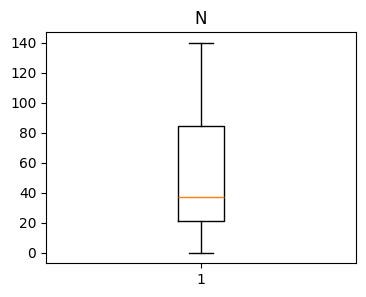

for column N
IQR----- 63.25
Upper Whisker--- 179.125
Lower Whisker--- -73.875


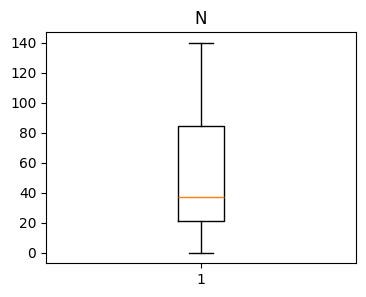

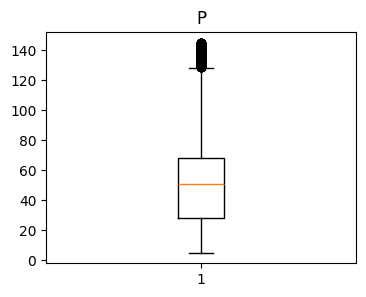

for column P
IQR----- 40.0
Upper Whisker--- 128.0
Lower Whisker--- -32.0


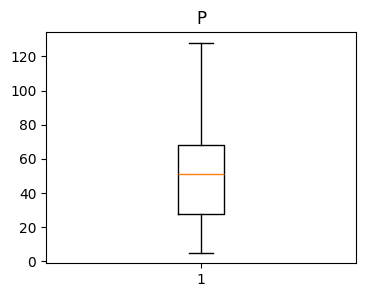

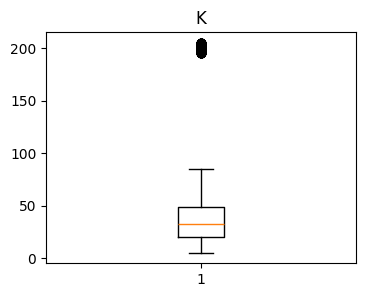

for column K
IQR----- 29.0
Upper Whisker--- 92.5
Lower Whisker--- -23.5


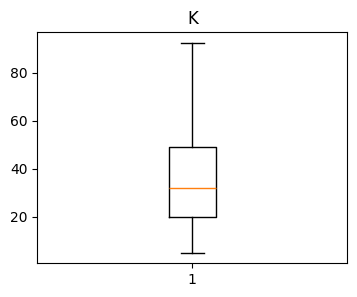

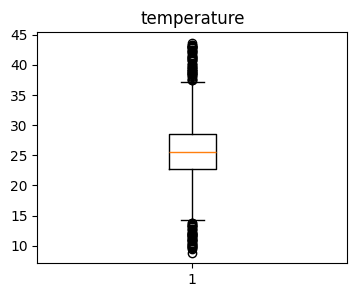

for column temperature
IQR----- 5.792279300000001
Upper Whisker--- 37.2500728825
Lower Whisker--- 14.080955682499999


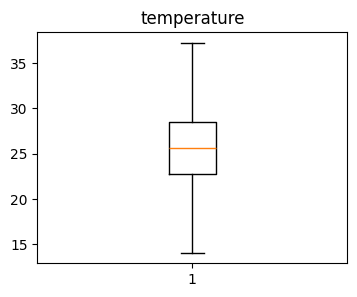

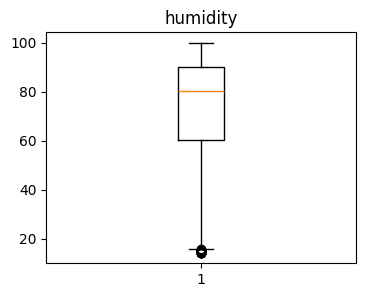

for column humidity
IQR----- 29.6868179525
Upper Whisker--- 134.47899768374998
Lower Whisker--- 15.731725873750001


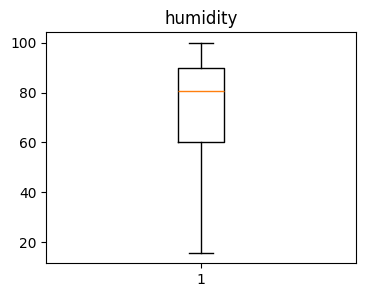

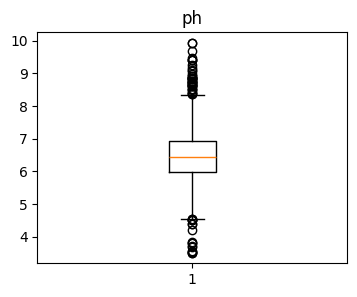

for column ph
IQR----- 0.9519498220000004
Upper Whisker--- 8.351567354250001
Lower Whisker--- 4.543768066249999


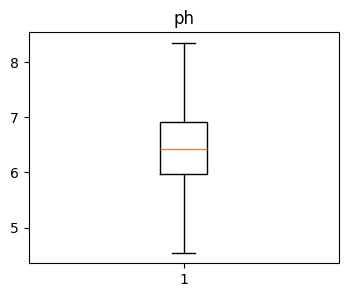

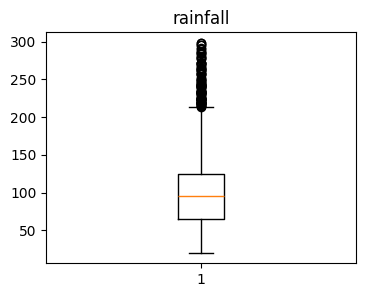

for column rainfall
IQR----- 59.715821800000015
Upper Whisker--- 213.84124050000003
Lower Whisker--- -25.022046700000033


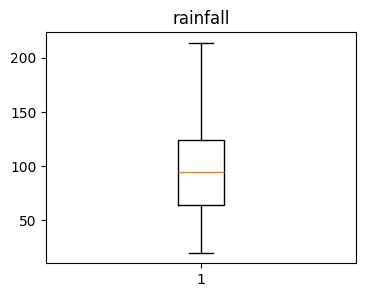

In [11]:
for  i in crop.describe().columns:
    plt.figure(figsize=(4,3))
    plt.boxplot(crop[i])     
    plt.title(i)
    plt.show()

    
    q1=crop[i].quantile(0.25)
    q3=crop[i].quantile(0.75)
    iqr=q3-q1
    upper=q3+(1.5*iqr)
    lower=q1-(1.5*iqr)
    
    print("for column" ,i) 
    print("IQR-----",iqr)
    print("Upper Whisker---",upper)
    print("Lower Whisker---",lower)
    
    crop.loc[crop[i]<lower,i]=lower
    crop.loc[crop[i]>upper,i]=upper
    
    plt.figure(figsize=(4,3))
    plt.boxplot(crop[i])
    plt.title(i)
    plt.show()

### Calculate skewness of each numeric feature in the dataset

In [12]:
skewness = crop.drop('label', axis=1).skew()  
print(skewness) 

N              0.509721
P              0.836609
K              1.116640
temperature    0.070778
humidity      -1.087575
ph             0.146471
rainfall       0.663507
dtype: float64


### Correlation Matrix to Analyze Feature Relationships

In [13]:
corr=crop.corr(numeric_only=True)
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.227834,0.019000,0.023850,0.190746,0.106321,0.044041
P,-0.227834,1.000000,0.561850,-0.132569,-0.138850,-0.140243,-0.063986
K,0.019000,0.561850,1.000000,-0.164312,0.120765,-0.107937,-0.026358
temperature,0.023850,-0.132569,-0.164312,1.000000,0.212362,-0.020906,-0.041047
humidity,0.190746,-0.138850,0.120765,0.212362,1.000000,0.000323,0.085163
ph,0.106321,-0.140243,-0.107937,-0.020906,0.000323,1.000000,-0.119116
rainfall,0.044041,-0.063986,-0.026358,-0.041047,0.085163,-0.119116,1.000000


### Visualizing Correlation Matrix with Heatmap

<Axes: >

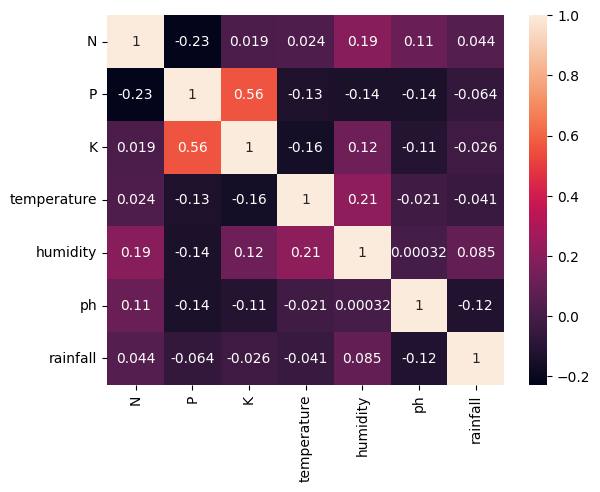

In [14]:
sns.heatmap(corr, annot=True, cbar= True)

### Distribution of Crop Labels in the Dataset

In [15]:
crop.label.value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

### Identifying Unique Crop Labels in the Dataset

In [16]:
crop['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

### Identifying Unique Crop Labels size in the Dataset

In [17]:
crop['label'].unique().size

22

### Visualizing the Distribution of Nitrogen (N) Levels

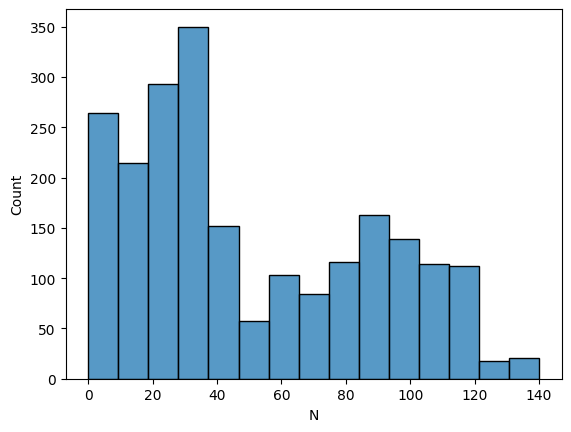

In [31]:
sns.histplot(crop['N'])
plt.show()

### Visualizing the Distribution of Phosphorus (P) Levels

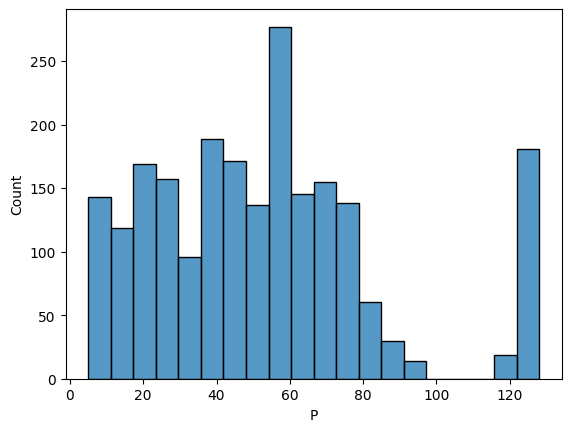

In [32]:
sns.histplot(crop['P'])
plt.show()

### Visualizing the Distribution of Potassium (K) Levels

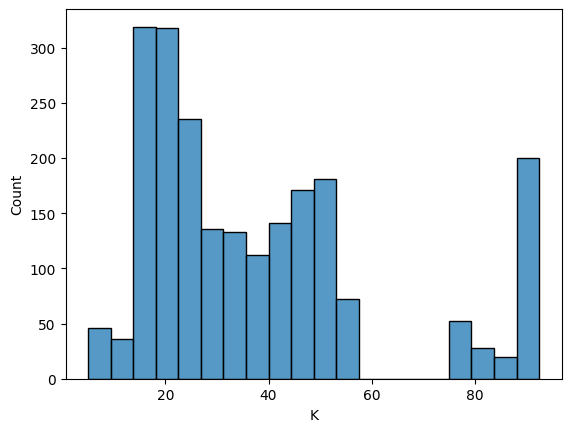

In [33]:
sns.histplot(crop['K'])
plt.show()

### Visualizing the Distribution of Temperature

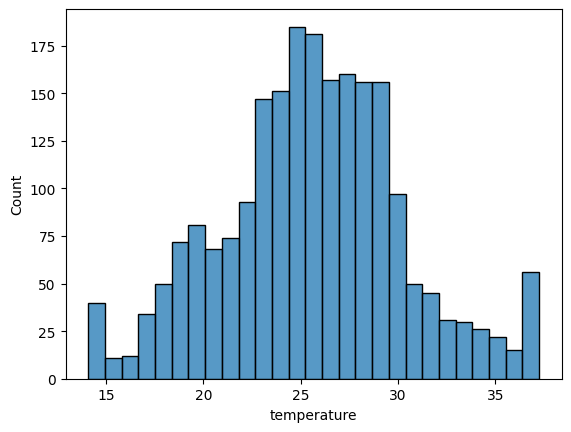

In [34]:
sns.histplot(crop['temperature'])
plt.show()

### Visualizing the Distribution of Humidity	

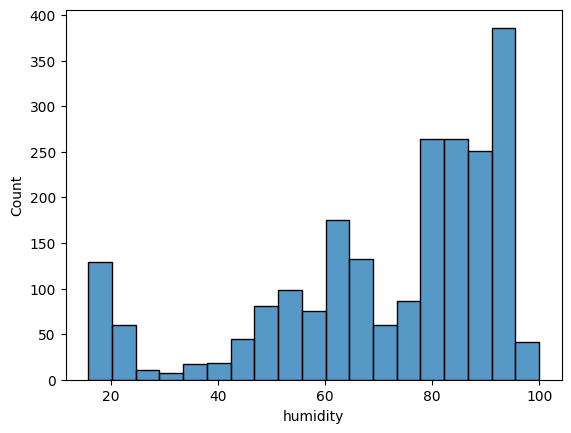

In [35]:
sns.histplot(crop['humidity'])
plt.show()

### Visualizing the Distribution of pH

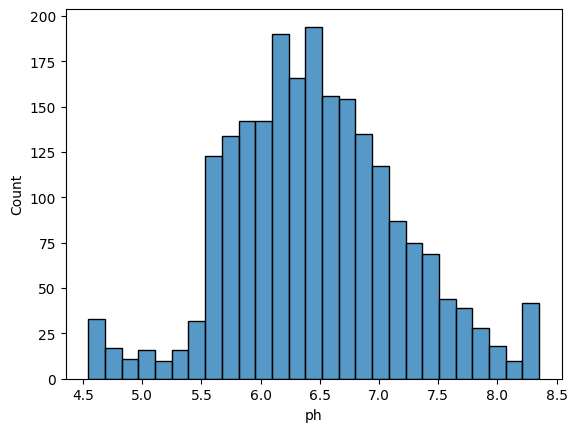

In [37]:
sns.histplot(crop['ph'])
plt.show()

### Visualizing the Distribution of Rainfall

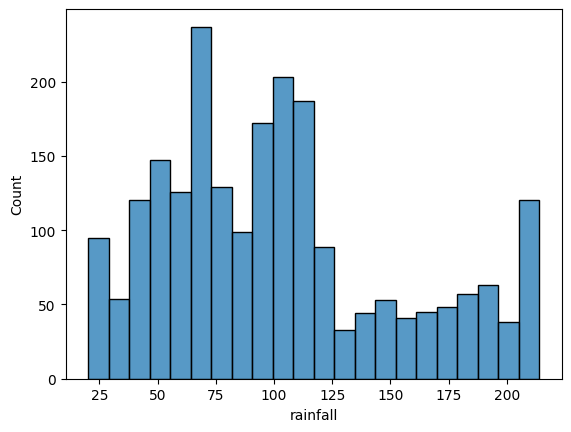

In [38]:
sns.histplot(crop['rainfall'])
plt.show()

## Encoding Categorical Labels for Crop Classification Using a Dictionary

In [18]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'chickpea': 3,
    'kidneybeans': 4,
    'pigeonpeas': 5,
    'mothbeans': 6,
    'mungbean': 7,
    'blackgram': 8,
    'lentil': 9,
    'pomegranate': 10,
    'banana': 11,
    'mango': 12,
    'grapes': 13,
    'watermelon': 14,
    'muskmelon': 15,
    'apple': 16,
    'orange': 17,
    'papaya': 18,
    'coconut': 19,
    'cotton': 20,
    'jute': 21,
    'coffee':22
}

crop['label'] = crop['label'].map(crop_dict)

### Displaying the Updated DataFrame

In [21]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90.0,42,43.0,20.879744,82.002744,6.502985,202.935536,1
1,85.0,58,41.0,21.770462,80.319644,7.038096,213.841241,1
2,60.0,55,44.0,23.004459,82.320763,7.840207,213.841241,1
3,74.0,35,40.0,26.491096,80.158363,6.980401,213.841241,1
4,78.0,42,42.0,20.130175,81.604873,7.628473,213.841241,1


### Checking Unique Crop Labels Again

In [22]:
crop['label'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

### Value Distribution of  Crop Labels Again

In [23]:
crop['label'].value_counts()

label
1     100
2     100
3     100
4     100
5     100
6     100
7     100
8     100
9     100
10    100
11    100
12    100
13    100
14    100
15    100
16    100
17    100
18    100
19    100
20    100
21    100
22    100
Name: count, dtype: int64

### Separating Features and Target Variable

In [24]:
X = crop.drop('label', axis=1)
y = crop['label']

### Splitting the Data into Training and Testing Part

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape

(1760, 7)

In [27]:
X_test.shape

(440, 7)

### Feature Scaling: Enhancing Model Performance with Min-Max Normalization

In [28]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

### Display Scaled Training Data

In [29]:
X_train

array([[0.12142857, 0.08943089, 0.10285714, ..., 0.90741433, 0.54671227,
        0.42683288],
       [0.26428571, 0.60162602, 0.16      , ..., 0.63639219, 0.68285498,
        0.25350661],
       [0.05      , 0.55284553, 0.22857143, ..., 0.56261534, 0.720702  ,
        0.12842796],
       ...,
       [0.07857143, 0.25203252, 0.29714286, ..., 0.42786788, 0.50729598,
        0.41295249],
       [0.07857143, 0.96747967, 1.        , ..., 0.76361423, 0.47727648,
        0.26380037],
       [0.22857143, 0.59349593, 0.19428571, ..., 0.55339782, 0.64690107,
        0.17081269]], shape=(1760, 7))

## Model Selection

### Importing Machine Learning Models and Evaluation Metrics

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

### Create the Object For Each Model Using Dictionary

In [31]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier()
}

### Model Fit and Accuracy Evaluation

In [32]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = round(accuracy_score(y_test, y_pred),3)
    print(f"{name} model having accuracy: {score}")

LogisticRegression model having accuracy: 0.932
GaussianNB model having accuracy: 0.995
SVC model having accuracy: 0.975
KNeighborsClassifier model having accuracy: 0.973
DecisionTreeClassifier model having accuracy: 0.986
ExtraTreeClassifier model having accuracy: 0.902
RandomForestClassifier model having accuracy: 0.993
BaggingClassifier model having accuracy: 0.989
GradientBoostingClassifier model having accuracy: 0.982
AdaBoostClassifier model having accuracy: 0.145


### Model Fitting and Prediction with Random Forest Classifier and Evaluating Accuracy

In [33]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
round(accuracy_score(y_test, y_pred),3)

0.993

## Define a Crop Recommendation Function

In [34]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    mx_features = mx.transform(features) 
    prediction = randclf.predict(mx_features).reshape(1, -1)
    return prediction[0][0]  

### Saving the Best Model Using Pickle

In [35]:
import joblib
joblib.dump(randclf, 'crop_recommendation_model.pkl')

['crop_recommendation_model.pkl']

In [36]:
joblib.dump(mx, 'scaler.pkl')

['scaler.pkl']

In [37]:
import joblib
reverse_crop_dict = {v: k for k, v in crop_dict.items()}
joblib.dump(reverse_crop_dict, 'reverse_crop_dict.pkl')

['reverse_crop_dict.pkl']